In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv("/content/Used Car Dataset.csv")


In [2]:
df.dtypes

Unnamed: 0              int64
car_name               object
registration_year      object
insurance_validity     object
fuel_type              object
seats                   int64
kms_driven              int64
ownsership             object
transmission           object
manufacturing_year     object
mileage(kmpl)         float64
engine(cc)            float64
max_power(bhp)        float64
torque(Nm)            float64
price(in lakhs)       float64
dtype: object

In [3]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# Convert to numeric format (year)
df['registration_year'] = pd.to_datetime(df['registration_year'], errors='coerce').dt.year
df['manufacturing_year'] = pd.to_datetime(df['manufacturing_year'], errors='coerce').dt.year

# One-Hot Encoding for 'insurance_validity', 'fuel_type', 'transmission', and 'ownership'
# Corrected list of columns for One-Hot Encoding
# Corrected list of columns for One-Hot Encoding
one_hot_columns = ['insurance_validity', 'fuel_type', 'transmission', 'ownsership']


one_hot_encoder = OneHotEncoder()
one_hot_encoded = one_hot_encoder.fit_transform(df[one_hot_columns])

# Create a DataFrame from the encoded columns
one_hot_df = pd.DataFrame(one_hot_encoded.toarray(),
                          columns=one_hot_encoder.get_feature_names_out(one_hot_columns))

# Merge the new DataFrame with the original and drop the original columns
df = df.join(one_hot_df).drop(columns=one_hot_columns)

# Frequency Encoding for 'car_name'
frequency_encode = df['car_name'].value_counts(normalize=True)
df['car_name'] = df['car_name'].map(frequency_encode)

df.head()


,Unnamed: 0,car_name,registration_year,seats,kms_driven,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),...,ownsership_1998 cc,ownsership_2013,ownsership_2993 cc,ownsership_2999 cc,ownsership_998 cc,ownsership_999 cc,ownsership_Fifth Owner,ownsership_First Owner,ownsership_Second Owner,ownsership_Third Owner
0,0,0.000644,NaN,5,56000,2017.0,7.81,2996.0,2996.0,333.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,0.000644,NaN,5,30615,2020.0,17.40,999.0,999.0,9863.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,0.000644,NaN,5,24000,2018.0,20.68,1995.0,1995.0,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,0.000644,NaN,5,18378,2019.0,16.50,1353.0,1353.0,13808.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,0.000644,NaN,5,44900,2019.0,14.67,1798.0,1798.0,17746.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [4]:
df.shape

(1553, 56)

In [5]:
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = df.dropna()
X = df.drop(['max_power(bhp)', 'Unnamed: 0'], axis=1)
y = df['max_power(bhp)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor(),
    'Decision Tree': DecisionTreeRegressor()
}

# Loop to test each model
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions on the test set

    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Print the results for each model
    print(f'Model: {model_name}')
    print(f'R2 Score: {r2:.2f}')
    print(f'MAE: {mae:.2f}')


Model: Linear Regression
R2 Score: 1.00
MAE: 0.00
Model: Random Forest
R2 Score: 0.95
MAE: 202.82
Model: Gradient Boosting
R2 Score: 1.00
MAE: 0.72
Model: XGBoost
R2 Score: 1.00
MAE: 7.76
Model: Decision Tree
R2 Score: 1.00
MAE: 0.26


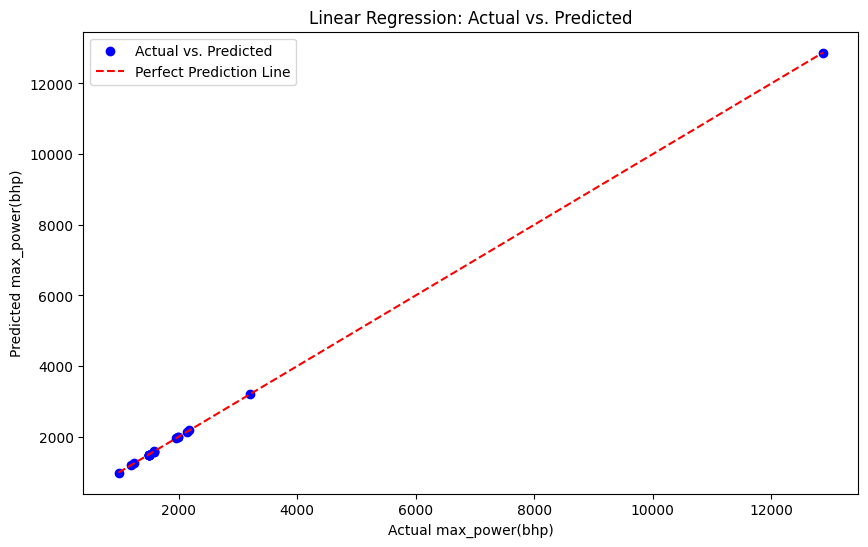

In [6]:
import matplotlib.pyplot as plt
import numpy as np


# Scatter plot for Linear Regression predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction Line')
plt.title('Linear Regression: Actual vs. Predicted')
plt.xlabel('Actual max_power(bhp)')
plt.ylabel('Predicted max_power(bhp)')
plt.legend()
plt.show()


In [7]:
import pandas as pd

# Assuming you have already trained and obtained predictions (y_pred) from your Linear Regression model
# If not, you may need to fit the Linear Regression model and make predictions first

# Create a DataFrame for actual and predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Display the actual and predicted values
print("Actual and Predicted Values:")
print(results_df)


Actual and Predicted Values:
       Actual  Predicted
907    1497.0     1497.0
286     986.0      986.0
1051   1995.0     1995.0
1108   1248.0     1248.0
12     1995.0     1995.0
321    2143.0     2143.0
393    1197.0     1198.0
419    1497.0     1497.0
112    2179.0     2179.0
443    1497.0     1497.0
1250   1582.0     1582.0
695    1497.0     1497.0
1242   1586.0     1582.0
497   12873.0    12873.0
150    1591.0     1591.0
52     1956.0     1956.0
232    3198.0     3198.0
325    1497.0     1497.0
385    1496.0     1496.0
